<a href="https://colab.research.google.com/github/Murcha1990/ML_AI24/blob/main/Hometasks/Base/AI_HW1_Regression_with_inference_base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание №1 (base)**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;
* реализовать веб-сервис для применения построенной модели на новых данных

**Максимальная оценка за дз**
> Оценка за домашку = $min(\text{ваш балл}, 11)$

**Мягкий дедлайн: 27 ноября 23:59**

**Жесткий дедлайн: 20 декабря 23:59 (конец модуля)**


**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.** Вопросы подсвечены синим цветом.

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

**Задание 0 (0 баллов).**
Для чего фиксируем сиды в домашках?

`Для того, чтобы зафиксировать рандом`

# **Часть 1 | EDA и визуализация**

Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (2.5 балла)
- Визуализации признаков и их анализ (1 балл)

Всего можно набрать 3.5 основных балла и 0.65 бонусных. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (2.5 балла)**

In [6]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1 (0.55 балла)**

Выполните операции, направленные на практику основных действий с `pandas`:
- [✅] Отобразите 10 случайных строк тренировочного датасета (0.15 балла)
- [✅] Отобразите первые 5 и последние 5 объектов тестового датасета (0.1 балла)
- [✅] Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
- [✅] Посмотрите, есть ли в данных явные дубликаты (0.05 балла)


**Бонус**
- [ ] Постройте дашборд, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)(0.15 балла)

In [7]:
df_train.sample(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6565,Renault KWID Climber 1.0 MT BSIV,2019,300000,35000,Petrol,Individual,Manual,First Owner,23.01 kmpl,999 CC,67 bhp,91Nm@ 4250rpm,5.0
2943,Maruti Wagon R LXI,2013,225000,58343,Petrol,Trustmark Dealer,Manual,First Owner,21.79 kmpl,998 CC,67.05 bhp,90Nm@ 3500rpm,5.0
2024,Hyundai i20 Asta 1.2,2013,360000,30000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
263,Hyundai i20 1.2 Asta,2010,300000,70000,Petrol,Individual,Manual,First Owner,17.0 kmpl,1197 CC,80 bhp,"11.4 kgm at 4,000 rpm",5.0
4586,Skoda Octavia L and K 1.9 TDI MT,2005,250000,120000,Diesel,Individual,Manual,Third Owner,16.4 kmpl,1896 CC,90 bhp,"21.4@ 1,900(kgm@ rpm)",5.0
4479,Maruti Ciaz ZXi,2016,700000,20000,Petrol,Individual,Manual,First Owner,20.73 kmpl,1373 CC,91.1 bhp,130Nm@ 4000rpm,5.0
4881,Hyundai Grand i10 1.2 Kappa Magna BSIV,2017,445000,27000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
3583,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,22.7 kmpl,1498 CC,89.84 bhp,204Nm@ 2000-2750rpm,5.0
6361,Hyundai Verna 1.4 VTVT,2014,500000,33400,Petrol,Individual,Manual,First Owner,17.43 kmpl,1396 CC,105.5 bhp,135.3Nm@ 5000rpm,5.0
4108,Hyundai i20 Era 1.2,2015,490000,45900,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0


In [8]:
df_train.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0


In [9]:
df_train.tail(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6994,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
6995,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
6996,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0
6998,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [10]:
train_miss = df_train.isnull().sum()

for k, v in train_miss.items():
    if v > 0:
        print(k)

mileage
engine
max_power
torque
seats


In [11]:
test_miss = df_test.isnull().sum()

for k, v in test_miss.items():
    if v > 0:
        print(k)

mileage
engine
max_power
torque
seats


In [12]:
print("duplicates in the train dataset:", df_train.duplicated().sum())
print("duplicates in the test dataset:", df_test.duplicated().sum())

duplicates in the train dataset: 985
duplicates in the test dataset: 62


Мы обнаружили пропуски. Давайте избавимся от них.

- [✅] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось. Заполнение пропусков проводите для обоих наборов данных, если необходимо

**Важно!**

При заполнении пропусков и в тестовом, и тренировочном наборах данных вы определяетесь со стратегией предобработки пропущенных значений при потенциальной работе модели.

Так как в теоретическом случае вы не имеете доступа к тестовой выборке, то заполняемой значение (у нас — медиана) вы считаете про *тренировочному* набору данных и им же заполняете *тестовый*.

In [13]:
c = ["mileage", "engine", "max_power", "torque", "seats"]

df_train["mileage"] = df_train["mileage"].str.extract('(\d+\.?\d*)').astype(float)
df_test["mileage"] = df_test["mileage"].str.extract('(\d+\.?\d*)').astype(float)

df_train["mileage"].fillna(df_train["mileage"].median(), inplace=True)
df_test["mileage"].fillna(df_test["mileage"].median(), inplace=True)

# for i in c:
#     df_train[i].fillna(df_train[i].median(), inplace=True)
#     df_test[i].fillna(df_test[i].median(), inplace=True)

In [14]:
df_train["engine"] = df_train["engine"].str.extract('(\d+\.?\d*)').astype(float)
df_test["engine"] = df_test["engine"].str.extract('(\d+\.?\d*)').astype(float)

df_train["engine"].fillna(df_train["engine"].median(), inplace=True)
df_test["engine"].fillna(df_test["engine"].median(), inplace=True)

In [15]:
df_train["max_power"] = df_train["max_power"].str.extract('(\d+\.?\d*)').astype(float)
df_test["max_power"] = df_test["max_power"].str.extract('(\d+\.?\d*)').astype(float)

df_train["max_power"].fillna(df_train["max_power"].median(), inplace=True)
df_test["max_power"].fillna(df_test["max_power"].median(), inplace=True)

In [16]:
df_train["seats"].fillna(df_train["seats"].median(), inplace=True)
df_test["seats"].fillna(df_test["seats"].median(), inplace=True)

In [17]:
def get_int_torque(t):
    if pd.isnull(t):
        return None

    t = t.lower()

    if "@" in t:
        first = t.split("@")[0].strip()

        if "nm" in first:
            return float(first.split("nm")[0].strip())
        elif "kgm" in first:
            return float(first.split("kgm")[0].strip()) * 10
        elif "@" in first:
            return float(first.split("@")[0].strip())
        elif "(" in first:
            return float(first.split("(")[0].strip())
        else:
            return float(first)
    elif "kgm" in t:
        first = t.split("kgm")[0].strip()

        if "nm" in first:
            return float(first.split("nm")[0].strip())
        else:
            return float(first) * 10
    elif "/" in t:
        first = t.split("/")[0].strip()

        if "nm" in t:
            return float(first.split("nm")[0].strip())
        else:
            return float(first)
    else:
        if "nm" in t:
            return float(t.split("nm")[0].strip())
        else:
            return float(t)

In [18]:
df_train['torque'] = df_train["torque"].apply(get_int_torque)

In [19]:
df_test['torque'] = df_test["torque"].apply(get_int_torque)

In [20]:
df_train['torque'].fillna(df_train['torque'].median(), inplace=True)
df_test['torque'].fillna(df_test['torque'].median(), inplace=True)

### **Задание 2 (0.5 балла)**

- [✅] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.1 балла)
- [✅] Отобразите такие объекты (0.15 балла)
- [✅] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.15 балла)
- [✅]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.1 балла)


In [21]:
dup = df_train.duplicated(subset=df_train.columns.difference(['selling_price']), keep=False)

print(dup.sum())

1799


In [22]:
df_train[dup]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
22,Maruti Baleno Delta 1.2,2016,575000,45000,Petrol,Individual,Manual,First Owner,21.40,1197.0,83.10,115.0,5.0
26,Maruti Omni E MPI STD BS IV,2018,254999,25000,Petrol,Individual,Manual,First Owner,16.80,796.0,34.20,59.0,8.0
27,Maruti Vitara Brezza LDi Option,2017,670000,70000,Diesel,Individual,Manual,First Owner,24.30,1248.0,88.50,200.0,5.0
28,Fiat Palio 1.2 ELX,2003,70000,50000,Petrol,Individual,Manual,Second Owner,19.30,1248.0,82.00,160.0,5.0
29,Maruti Omni 8 Seater BSIV,2012,150000,35000,Petrol,Individual,Manual,Second Owner,14.00,796.0,35.00,61.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6981,Ford Freestyle Titanium Plus Diesel BSIV,2018,750000,24000,Diesel,Individual,Manual,First Owner,24.40,1498.0,98.63,215.0,5.0
6984,Ford Freestyle Titanium Plus Diesel BSIV,2018,746000,24000,Diesel,Individual,Manual,First Owner,24.40,1498.0,98.63,215.0,5.0
6989,Maruti Swift Dzire VDI,2015,625000,50000,Diesel,Individual,Manual,First Owner,26.59,1248.0,74.00,190.0,5.0
6997,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70.00,140.0,5.0


In [23]:
df_train = df_train.drop_duplicates(subset=df_train.columns.difference(['selling_price']), keep='first')

In [24]:
df_train.shape

(5840, 13)

In [25]:
assert df_train.shape == (5840, 13)

In [26]:
df_train.reset_index(drop=True, inplace=True)

Отлично! Мы избавились от маленьких и явных проблем. Теперь перейдем к более сложным недостаткам полученной таблицы.

### **Задание 3 (0.25 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [✅] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [✅] Приведите тип данных к ``float``.
* [✅] Удалите столбец ``torque``


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.
- Стобец ``torque`` мы удаляем для простоты. В идеальном случае, его также стоило бы предобработать.

In [27]:
# я сделал это при заполении пустот, чтобы для каждого столбца получить медиану

In [28]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           5840 non-null   object 
 1   year           5840 non-null   int64  
 2   selling_price  5840 non-null   int64  
 3   km_driven      5840 non-null   int64  
 4   fuel           5840 non-null   object 
 5   seller_type    5840 non-null   object 
 6   transmission   5840 non-null   object 
 7   owner          5840 non-null   object 
 8   mileage        5840 non-null   float64
 9   engine         5840 non-null   float64
 10  max_power      5840 non-null   float64
 11  torque         5840 non-null   float64
 12  seats          5840 non-null   float64
dtypes: float64(5), int64(3), object(5)
memory usage: 593.3+ KB


In [29]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           1000 non-null   object 
 1   year           1000 non-null   int64  
 2   selling_price  1000 non-null   int64  
 3   km_driven      1000 non-null   int64  
 4   fuel           1000 non-null   object 
 5   seller_type    1000 non-null   object 
 6   transmission   1000 non-null   object 
 7   owner          1000 non-null   object 
 8   mileage        1000 non-null   float64
 9   engine         1000 non-null   float64
 10  max_power      1000 non-null   float64
 11  torque         1000 non-null   float64
 12  seats          1000 non-null   float64
dtypes: float64(5), int64(3), object(5)
memory usage: 101.7+ KB


In [30]:
df_train.drop(columns=['torque'], inplace=True)
df_test.drop(columns=['torque'], inplace=True)

### **Задание 4 (0.1 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.

In [31]:
df_train['engine'] = df_train['engine'].astype(int)
df_train['seats'] = df_train['seats'].astype(int)

In [32]:
df_test['engine'] = df_test['engine'].astype(int)
df_test['seats'] = df_test['seats'].astype(int)

### **Задание 5 (0.1 балла)**

Отлично! Мы провели "косметическую" предобработку и теперь готовы сделать важный шаг в контексте анализа данных. А именно — посмотреть на статистики!

**Ваша задача:**
- [✅] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [✅] Посчитайте основные статистики по категориальным столбцам для трейна и теста

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

**Примечание:**

Более корректно рассматривать статистики до заполнения пропусков и после, чтобы убедиться, что мы не внесли каких-либо серьезных сдвигов в изначальные рапсределения.

In [33]:
df_train.describe()

,year,selling_price,km_driven,mileage,engine,max_power,seats
count,5840.000000,5.840000e+03,5.840000e+03,5840.000000,5840.000000,5840.000000,5840.000000
mean,2013.428425,5.229601e+05,7.395224e+04,19.428611,1429.448973,87.910782,5.426712
std,4.095622,5.354320e+05,6.007114e+04,3.986026,485.662834,31.639585,0.982344
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,0.000000,2.000000
25%,2011.000000,2.500000e+05,3.900000e+04,16.950000,1197.000000,68.000000,5.000000
50%,2014.000000,4.050000e+05,7.000000e+04,19.300000,1248.000000,81.860000,5.000000
75%,2017.000000,6.400000e+05,1.000000e+05,22.300000,1498.000000,99.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,14.000000


In [34]:
df_train.describe(include=['object'])

,name,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840,5840
unique,1924,4,3,2,5
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner
freq,91,3177,5223,5336,3603


In [35]:
df_test.describe(include=['object'])

,name,fuel,seller_type,transmission,owner
count,1000,1000,1000,1000,1000
unique,621,4,3,2,5
top,Maruti Alto 800 LXI,Diesel,Individual,Manual,First Owner
freq,15,534,837,877,623


In [36]:
df_train.describe()

,year,selling_price,km_driven,mileage,engine,max_power,seats
count,5840.000000,5.840000e+03,5.840000e+03,5840.000000,5840.000000,5840.000000,5840.000000
mean,2013.428425,5.229601e+05,7.395224e+04,19.428611,1429.448973,87.910782,5.426712
std,4.095622,5.354320e+05,6.007114e+04,3.986026,485.662834,31.639585,0.982344
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,0.000000,2.000000
25%,2011.000000,2.500000e+05,3.900000e+04,16.950000,1197.000000,68.000000,5.000000
50%,2014.000000,4.050000e+05,7.000000e+04,19.300000,1248.000000,81.860000,5.000000
75%,2017.000000,6.400000e+05,1.000000e+05,22.300000,1498.000000,99.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,14.000000


In [37]:
assert df_train.shape == (5840, 13)

AssertionError: 

## **Визуализации (1 балл + 0.5 бонус)**



Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 6 (0.5 балла)**

Шаг 1.
- [✅] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [✅] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [✅] Постройте pairplot по тестовым данным
- [✅] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

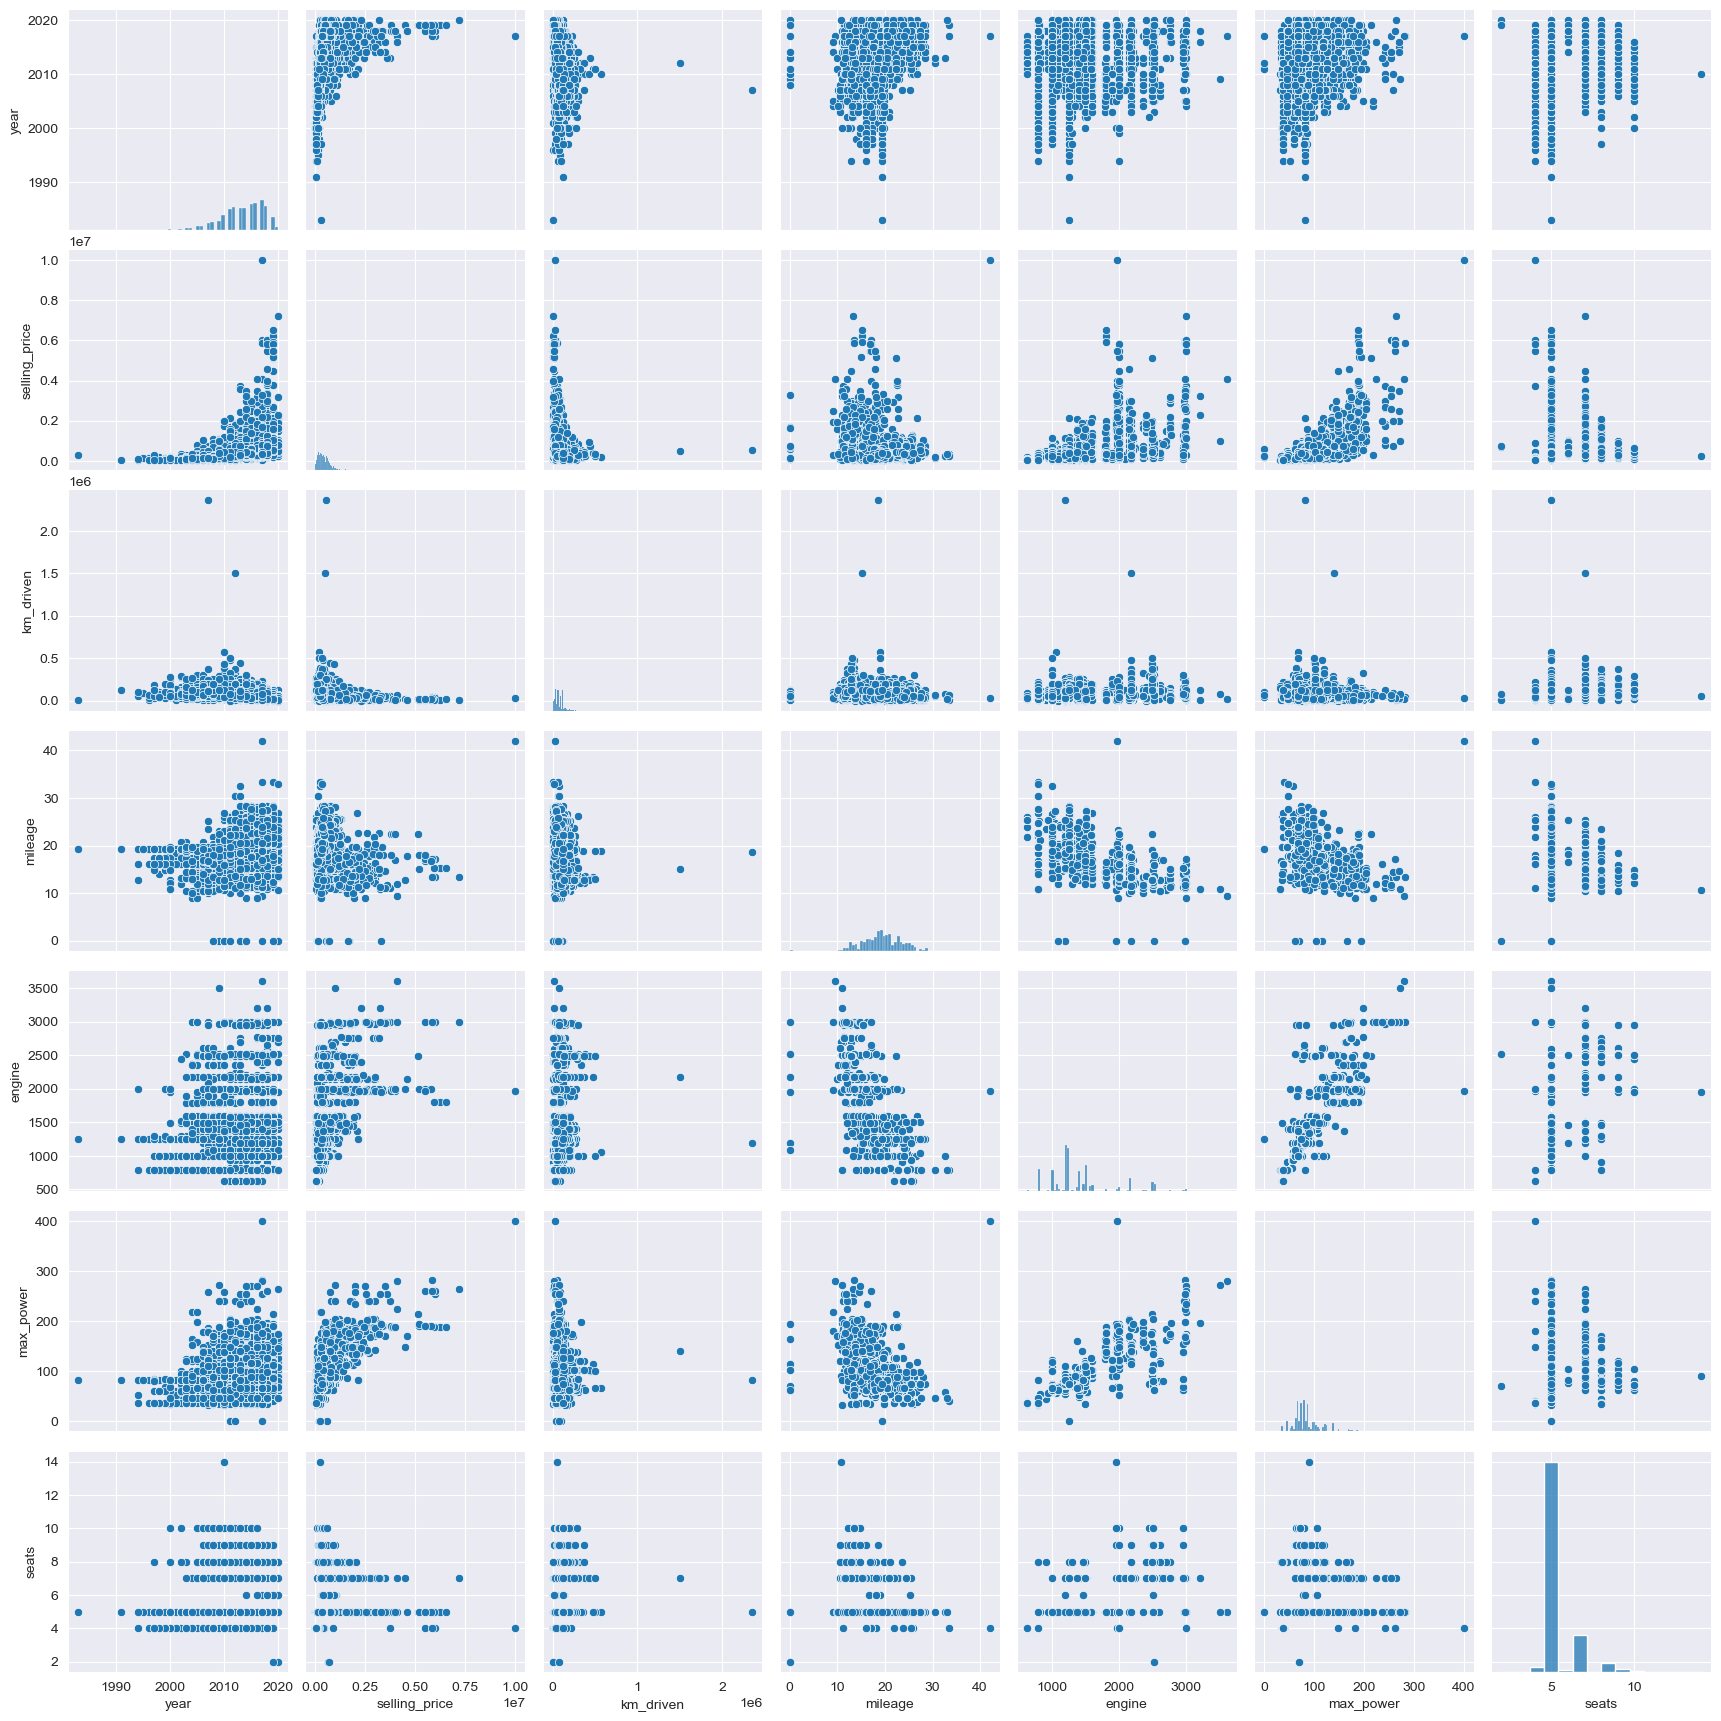

In [38]:
sns.pairplot(df_train[df_train.select_dtypes(include=['int64', 'float64']).columns])
plt.show()

`> Можно ли предположить на основе распределений связь признаков с целевой переменной?`
да, можно. к примеру, есть намеки на то, что целевая переменная имеет какое-то отношение к max_power

`>Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?`
да, можно. к примеру, есть намеки на то, что engine имеет какое-то отношение к max_power

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

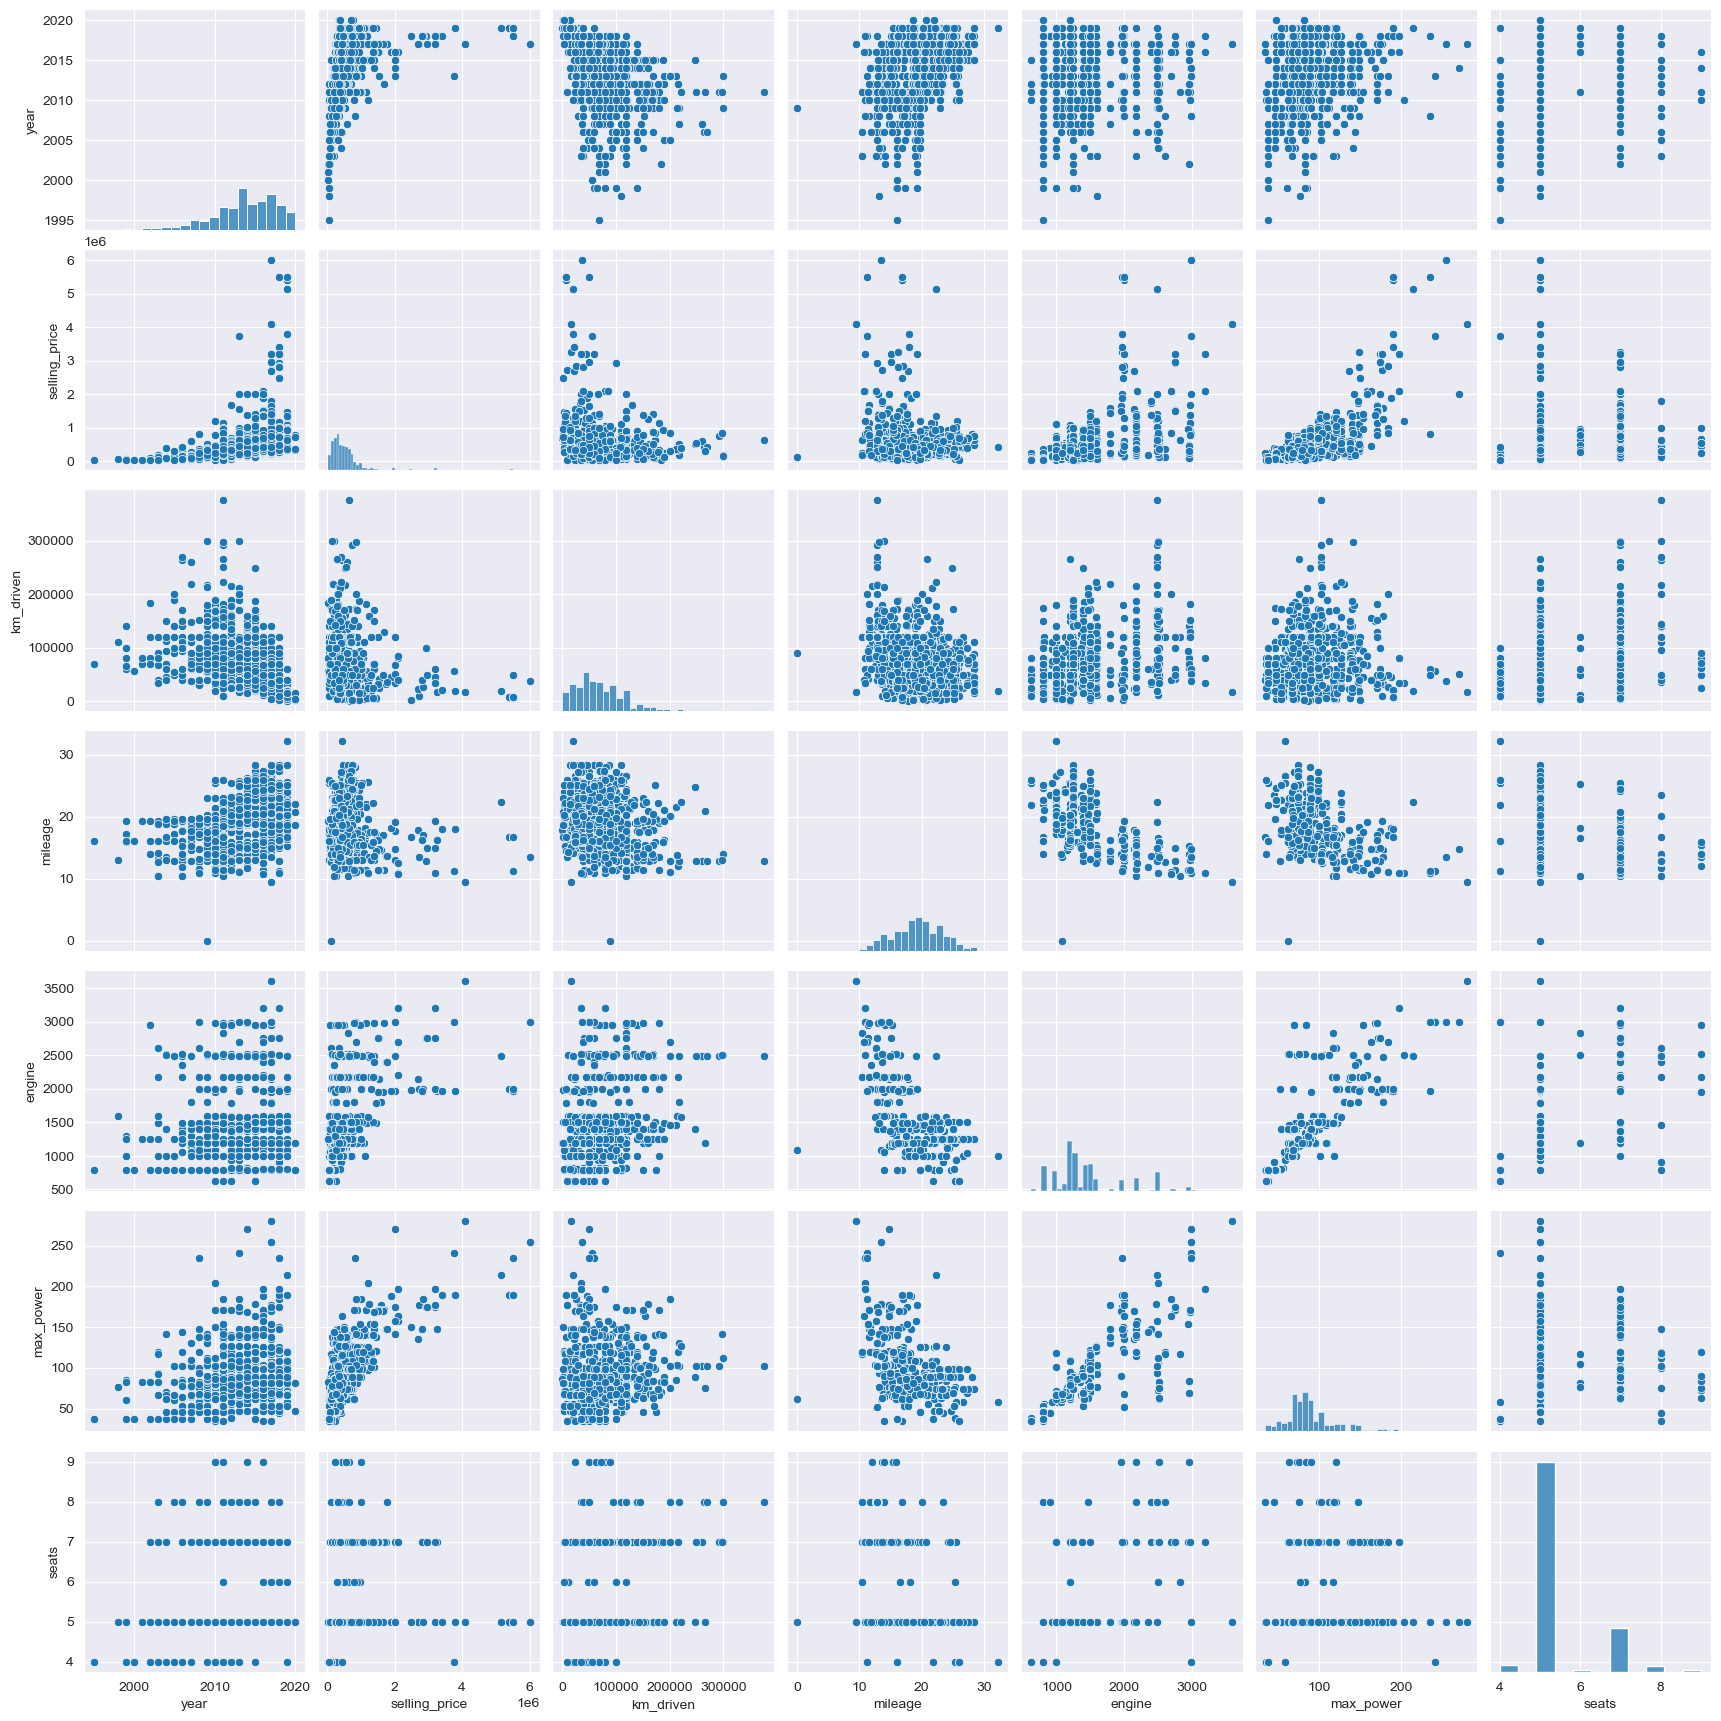

In [39]:
sns.pairplot(df_test[df_test.select_dtypes(include=['int64', 'float64']).columns])
plt.show()

`>Похожими ли оказались совокупности при разделении на трейн и тест?`
да, похожи

### **Задание 7 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [✅] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [✅] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)


In [40]:
corr = df_train[df_train.select_dtypes(include=['int64', 'float64']).columns].corr()

In [41]:
corr

,year,selling_price,km_driven,mileage,engine,max_power,seats
year,1.000000,0.427279,-0.368966,0.342172,0.002819,0.156648,0.041178
selling_price,0.427279,1.000000,-0.164828,-0.104458,0.447672,0.692754,0.149953
km_driven,-0.368966,-0.164828,1.000000,-0.182245,0.229766,0.024630,0.192328
mileage,0.342172,-0.104458,-0.182245,1.000000,-0.572677,-0.373271,-0.450810
engine,0.002819,0.447672,0.229766,-0.572677,1.000000,0.681082,0.652172
max_power,0.156648,0.692754,0.024630,-0.373271,0.681082,1.000000,0.244060
seats,0.041178,0.149953,0.192328,-0.450810,0.652172,0.244060,1.000000


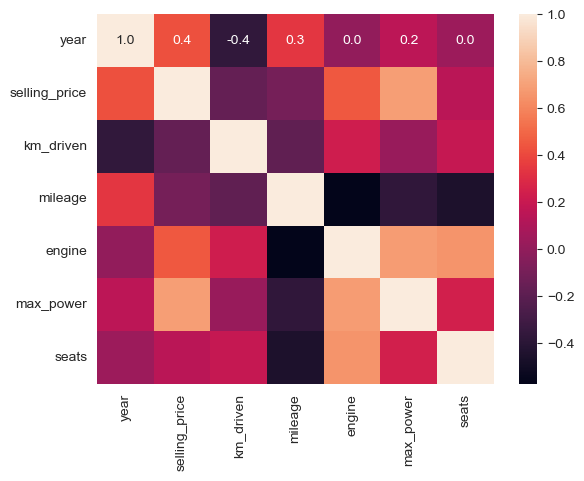

In [42]:
sns.heatmap(corr, annot=True, fmt=".1f")
plt.show()

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

`>Какие 2 признака наименее скоррелированы между собой?`
selling_price and max_power

`>Между какими наблюдается довольно сильная положительная линейная зависимость?`
max_power and engine, engine and seats, mileage and year

`>Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?`
 тут спорно, потому что корреляция не самая сильная

### **Бонус (0.5 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их **и поясните.**

In [43]:
# your code here

# **Часть 2 | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.25 балла;

### **Задание 8 (0.05 балла)**

Разбейте данные на тренировочный и тестовый наборы. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных.

In [44]:
df_train_i = df_train[df_train.select_dtypes(include=['int64', 'float64']).columns]
df_test_i = df_test[df_test.select_dtypes(include=['int64', 'float64']).columns]

In [45]:
y_train = df_train_i["selling_price"]
X_train = df_train_i[df_train_i.columns.difference(["selling_price"])]

In [46]:
assert X_train.shape == (5840, 6)

In [47]:
y_test = df_test_i["selling_price"]
X_test = df_test_i[df_test_i.columns.difference(["selling_price"])]

In [48]:
assert X_test.shape == (1000, 6)

### **Задание 9 (0.2 балла)**

Построим нашу первую модель!
- [✅] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [✅] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression()

In [50]:
print("r_score train:", r2_score(y_train, model_lr.predict(X_train)))
print("MSE train:", MSE(y_train, model_lr.predict(X_train)))
print("root MSE train:", MSE(y_train, model_lr.predict(X_train)) ** 0.5)
print()
print("r_score test:", r2_score(y_test, model_lr.predict(X_test)))
print("MSE test:", MSE(y_test, model_lr.predict(X_test)))
print("root MSE test:", MSE(y_test, model_lr.predict(X_test)) ** 0.5)

r_score train: 0.5922629595849872
MSE train: 116873067751.5217
root MSE train: 341867.0322676957

r_score test: 0.5941438519598431
MSE test: 233297703374.90607
root MSE test: 483009.0096208414


In [51]:
y_train.describe()

count    5.840000e+03
mean     5.229601e+05
std      5.354320e+05
min      2.999900e+04
25%      2.500000e+05
50%      4.050000e+05
75%      6.400000e+05
max      1.000000e+07
Name: selling_price, dtype: float64

`>Сделайте выводы по значениям метрик качества.`
Модель так себе обучилась, так MSE довольно большой, а $R^2$ показывает посредственные значения

### **Задание 10 (0.15 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [52]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [53]:
model_scaled = LinearRegression()
model_scaled.fit(X_train_scaled, y_train)

LinearRegression()

In [54]:
print("r_score train:", r2_score(y_train, model_scaled.predict(X_train_scaled)))
print("MSE train:", MSE(y_train, model_scaled.predict(X_train_scaled)))
print("root MSE train:", MSE(y_train, model_scaled.predict(X_train_scaled)) ** 0.5)
print()
print("r_score test:", r2_score(y_test, model_scaled.predict(X_test_scaled)))
print("MSE test:", MSE(y_test, model_scaled.predict(X_test_scaled)))
print("root MSE test:", MSE(y_test, model_scaled.predict(X_test_scaled)) ** 0.5)

r_score train: 0.5922629595849875
MSE train: 116873067751.52162
root MSE train: 341867.0322676956

r_score test: 0.5941438519597675
MSE test: 233297703374.94946
root MSE test: 483009.00962088635


### **Задание 11 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [55]:
feature_names = X_train.columns
coefficients = model_lr.coef_

coeffs_with_features = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

coeffs_with_features

,Feature,Coefficient
0,engine,125.976483
1,km_driven,-0.734992
2,max_power,10202.641566
3,mileage,7221.114448
4,seats,-23639.946620
5,year,37321.889568


`The coefficient with the greatest weight is max_power`

### **Задание 12 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [✅] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [✅] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [56]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(X_train_scaled, y_train)

Lasso()

In [57]:
print("r_score train:", r2_score(y_train, lasso.predict(X_train_scaled)))
print("MSE train:", MSE(y_train, lasso.predict(X_train_scaled)))
print("root MSE train:", MSE(y_train, lasso.predict(X_train_scaled)) ** 0.5)
print()
print("r_score test:", r2_score(y_test, lasso.predict(X_test_scaled)))
print("MSE test:", MSE(y_test, lasso.predict(X_test_scaled)))
print("root MSE test:", MSE(y_test, lasso.predict(X_test_scaled)) ** 0.5)

r_score train: 0.5922629595514317
MSE train: 116873067761.13998
root MSE train: 341867.032281763

r_score test: 0.5941426915730179
MSE test: 233298370398.38876
root MSE test: 483009.70010796754


In [58]:
feature_names = X_train.columns
coefficients = lasso.coef_

coeffs_with_features = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

coeffs_with_features

,Feature,Coefficient
0,engine,61172.232967
1,km_driven,-44146.934508
2,max_power,322780.489131
3,mileage,28779.233669
4,seats,-23217.788497
5,year,152843.082418


Ни один из весов не занулен, скорее всего из-за того, что в каждой фиче много информации важной.

### **Задание 13 Финальный рывок (0.5 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [✅] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [✅] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [59]:
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}

lasso_2 = Lasso()
gs = GridSearchCV(estimator=lasso_2, param_grid=param_grid, cv=10, scoring='r2')
gs.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000,
                                   100000]},
             scoring='r2')

In [60]:
print("reg coefficient of the best model: ", gs.best_params_['alpha'])

reg coefficient of the best model:  10000


In [61]:
feature_names = X_train.columns
coefficients = gs.best_estimator_.coef_

coeffs_with_features = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

coeffs_with_features

,Feature,Coefficient
0,engine,17872.317090
1,km_driven,-32728.313950
2,max_power,329186.079711
3,mileage,9245.513313
4,seats,-0.000000
5,year,151903.632403


`GridSearch обучил 90 моделей. Вес фичи seats занулился.`

In [62]:
print("r_score train:", r2_score(y_train, gs.predict(X_train_scaled)))
print("MSE train:", MSE(y_train, gs.predict(X_train_scaled)))
print("root MSE train:", MSE(y_train, gs.predict(X_train_scaled)) ** 0.5)
print()
print("r_score test:", r2_score(y_test, gs.predict(X_test_scaled)))
print("MSE test:", MSE(y_test, gs.predict(X_test_scaled)))
print("root MSE test:", MSE(y_test, gs.predict(X_test_scaled)) ** 0.5)

r_score train: 0.5892565411528256
MSE train: 117734822535.32504
root MSE train: 343125.08292942535

r_score test: 0.581585488626811
MSE test: 240516609230.81567
root MSE test: 490424.92721191864


**Ваша задача 2:**

- [✅] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [✅] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [63]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import make_scorer, mean_squared_error

param_grid_2 = {
    "alpha": np.logspace(start=1e-10, stop=1e3, num=50),
    "l1_ratio": np.logspace(start=0, stop=1, num=10)
}

scorer = make_scorer(mean_squared_error, greater_is_better=False)

gs2 = GridSearchCV(estimator=ElasticNet(), param_grid=param_grid_2, cv=10, scoring=scorer)
gs2.fit(X_train_scaled, y_train)

/opt/anaconda3/lib/python3.11/site-packages/numpy/core/function_base.py:298: RuntimeWarning: overflow encountered in power
  return _nx.power(base, y)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:589: RuntimeWarning: overflow encountered in scalar multiply
  l1_reg = alpha * l1_ratio * n_samples
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: nan, tolerance: 1.247e+11
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:589: RuntimeWarning: overflow encountered in scalar multiply
  l1_reg = alpha * l1_ratio * n_samples
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective d

GridSearchCV(cv=10, estimator=ElasticNet(),
             param_grid={'alpha': array([1.00000000e+000, 2.55954792e+020, 6.55128557e+040, 1.67683294e+061,
       4.29193426e+081, 1.09854114e+102, 2.81176870e+122, 7.19685673e+142,
       1.84206997e+163, 4.71486636e+183, 1.20679264e+204, 3.08884360e+224,
       7.90604321e+244, 2.02358965e+265, 5.17947468e+285, 1.32571137e+306,
                   inf,             inf,             inf,             inf,
                   inf,             inf,             inf,             inf,
                   inf,             inf,             inf,             inf,
                   inf,             inf,             inf,             inf,
                   inf,             inf,             inf,             inf,
                   inf,             inf,             inf,             inf,
                   inf,             inf,             inf,             inf,
                   inf,             inf,             inf,             inf,
                   inf,             inf]),
                         'l1_ratio': array([ 1.        ,  1.29154967,  1.66810054,  2.15443469,  2.7825594 ,
        3.59381366,  4.64158883,  5.9948425 ,  7.74263683, 10.        ])},
             scoring=make_scorer(mean_squared_error, greater_is_better=False))

In [64]:
print("hyperparameters of the best model", gs2.best_params_)
print("how many models trained", len(param_grid_2['alpha']) * len(param_grid_2['l1_ratio']) * 10)

hyperparameters of the best model {'alpha': 1.0000000002302585, 'l1_ratio': 1.0}
how many models trained 5000


# **Часть 3| Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.75 основных балла и 0.25 бонусных.


### **Задание 14 (0.1 балла)** Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

В этом домашнем задании мы предлагаем удалить его.

**Ваша задача:**
- [✅] Удалить столбец`name`

In [65]:
y_train_n = df_train["selling_price"]
X_train_n = df_train[df_train.columns.difference(["selling_price"])]

y_test_n = df_test["selling_price"]
X_test_n = df_test[df_test.columns.difference(["selling_price"])]

In [66]:
X_train_n.drop(columns=['name'], axis=1, inplace=True)
X_test_n.drop(columns=['name'], axis=1, inplace=True)

/var/folders/d7/y7btjjr14hq08zwczq_qknj00000gn/T/ipykernel_72537/1287230482.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_n.drop(columns=['name'], axis=1, inplace=True)
/var/folders/d7/y7btjjr14hq08zwczq_qknj00000gn/T/ipykernel_72537/1287230482.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_n.drop(columns=['name'], axis=1, inplace=True)


В другом случае, конечно, мы могли бы предобработать данный столбец. В качестве бонуса предлагаем вам придумать и реализовать алгоритм предобработки.

### **Бонус 0.5 балла**
- [ ] Предобработайте столбец `name`, чтобы избежать его удаления

In [67]:
# assert X_train_cat.shape == (5840, 10)

In [68]:
# X_train_cat.describe(include='object')

### **Задание 15 (0.4 балла)**

- [✅] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования. Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot.

In [69]:
from sklearn.preprocessing import OneHotEncoder  # или можно использовать get_dummies из библиотеки pandas

cols_to_drop = X_train_n.select_dtypes(include=['object']).columns.tolist()
cols_to_drop.append('seats')
cols_to_drop

['fuel', 'owner', 'seller_type', 'transmission', 'seats']

In [70]:
encoder = OneHotEncoder(drop='first', sparse=False)
ef = encoder.fit_transform(X_train_n[cols_to_drop])

/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [71]:
ef_names = encoder.get_feature_names_out(cols_to_drop)
ef_df = pd.DataFrame(ef, columns=ef_names, index=X_train_n.index)

In [72]:
X_train_encoded = pd.concat([X_train_n.drop(columns=cols_to_drop), ef_df], axis=1)

In [73]:
ef_2 = encoder.transform(X_test_n[cols_to_drop])
ef_df_2 = pd.DataFrame(ef_2, columns=ef_names, index=X_test_n.index)
X_test_encoded = pd.concat([X_test_n.drop(columns=cols_to_drop), ef_df_2], axis=1)

### **Задание 16 (0.25 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [✅] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [✅] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [74]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [0.01, 0.1, 1, 10, 100, 1000]}

gs_3 = GridSearchCV(estimator=Ridge(), param_grid=param_grid, cv=10, scoring='r2')
gs_3.fit(X_train_encoded, y_train)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100, 1000]}, scoring='r2')

In [75]:
print("r_score train:", r2_score(y_train, gs_3.predict(X_train_encoded)))
print("MSE train:", MSE(y_train, gs_3.predict(X_train_encoded)))
print("root MSE train:", MSE(y_train, gs_3.predict(X_train_encoded)) ** 0.5)
print()
print("r_score test:", r2_score(y_test, gs_3.predict(X_test_encoded)))
print("MSE test:", MSE(y_test, gs_3.predict(X_test_encoded)))
print("root MSE test:", MSE(y_test, gs_3.predict(X_test_encoded)) ** 0.5)

r_score train: 0.6537877907498757
MSE train: 99237692378.66853
root MSE train: 315020.1459885836

r_score test: 0.6456967198183761
MSE test: 203663642804.766
root MSE test: 451291.08433999226


Да, стало лучше. $R^2$ стал больше

# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 17 (0.5 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [✅] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса

In [76]:
def business_metric(y_true, y_pred):
    err_rate = np.abs((y_true - y_pred) / y_true)

    ten_p = np.sum(err_rate <= 0.10)

    return ten_p / len(y_true)


# LinearRegression
print(business_metric(y_test, model_lr.predict(X_test)))

# LinearRegression_scaled
print(business_metric(y_test, model_scaled.predict(X_test)))

# Lasso
print(business_metric(y_test, lasso.predict(X_test)))

# gs
print(business_metric(y_test, gs.predict(X_test)))

# gs2
print(business_metric(y_test, gs2.predict(X_test)))

# gs3
print(business_metric(y_test, gs_3.predict(X_test_encoded)))

0.227
0.0
0.0
0.0
0.0
0.247


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but ElasticNet was fitted without feature names
  warnings.warn(


`Лучше всего подходит Ridge с GS и OneHotEncoding'ом`

# **Часть 5 (3 балла) | Реализация сервиса на FastAPI**

### **Задание 18 (3 балла)**


Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [ ]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    return ...


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    return ...

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# **Часть 6 (1 балл) | Оформление результатов**

### **Задание 19 (1 балл)**


**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* сохраненный дашборд в любом формате
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете в md-файл приложить ссылку на screencast с демонстрацией
3. Просматривает ноутбук с DS-частью
4. Заглядывает в код сервиса
5. Хвалит

In [77]:
import pickle

In [87]:
saved_objects = {
    'grid_search': gs_3,
    'best_model': gs_3.best_estimator_,
    'best_params': gs_3.best_params_,
    'best_score': gs_3.best_score_,
    'weights': gs_3.best_estimator_.coef_,
    'intercept': gs_3.best_estimator_.intercept_,
    'feature_names': X_train_encoded.columns.tolist()
}

In [88]:
saved_objects

{'grid_search': GridSearchCV(cv=10, estimator=Ridge(),
              param_grid={'alpha': [0.01, 0.1, 1, 10, 100, 1000]}, scoring='r2'),
 'best_model': Ridge(alpha=10),
 'best_params': {'alpha': 10},
 'best_score': 0.6218786196491055,
 'weights': array([ 7.68510304e+01, -5.07522042e-01,  9.13856169e+03,  8.20194243e+03,
         3.61510247e+04,  1.86298016e+04,  1.15201433e+05, -3.65850460e+04,
        -3.73441575e+04, -5.31727122e+04,  9.35739920e+05, -3.63595762e+04,
        -1.11458916e+05, -9.74326319e+04, -2.90068241e+05,  4.44005892e+05,
        -9.47094042e+04, -1.50864915e+05, -8.69881304e+04, -4.52244563e+04,
        -4.54015120e+04, -1.63969427e+04, -2.29241377e+04]),
 'intercept': -72828139.75632323,
 'feature_names': ['engine',
  'km_driven',
  'max_power',
  'mileage',
  'year',
  'fuel_Diesel',
  'fuel_LPG',
  'fuel_Petrol',
  'owner_Fourth & Above Owner',
  'owner_Second Owner',
  'owner_Test Drive Car',
  'owner_Third Owner',
  'seller_type_Individual',
  'seller_type_T

In [101]:
import os

os.chdir('/Users/almazkhayrullin/Desktop/ml_master/hw_1')

In [102]:
with open("data.pickle", 'wb') as file:
    pickle.dump(saved_objects, file)

# **Часть Благодарственная**

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой!

<details>
<summary><b>Что-то приятное</b></summary>

**Напоминаем, что нашем курсе действует система кото-бонусов** 🐈

На фото по ссылке — сэр кот кого-то из команды курса (преподаватель, помощник преподавателя, ассистенты).

Предлагаем вам угадать — чей это товарищ!

[Первый кот](https://ibb.co/XbnpCTg)

</details>

